In [1]:
# Import Libraries
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

## Step 1: Reading and Understanding Data

In [2]:
df = pd.read_csv('Data_Negara_HELP.csv')
df

Negara  Kematian_anak  Ekspor  Kesehatan  Impor  Pendapatan  \
0            Afghanistan           90.2    10.0       7.58   44.9        1610   
1                Albania           16.6    28.0       6.55   48.6        9930   
2                Algeria           27.3    38.4       4.17   31.4       12900   
3                 Angola          119.0    62.3       2.85   42.9        5900   
4    Antigua and Barbuda           10.3    45.5       6.03   58.9       19100   
..                   ...            ...     ...        ...    ...         ...   
162              Vanuatu           29.2    46.6       5.25   52.7        2950   
163            Venezuela           17.1    28.5       4.91   17.6       16500   
164              Vietnam           23.3    72.0       6.84   80.2        4490   
165                Yemen           56.3    30.0       5.18   34.4        4480   
166               Zambia           83.1    37.0       5.89   30.9        3280   

     Inflasi  Harapan_hidup  Jumlah_fertiliti  GDPperkapita  
0       9.44           56.2              5.82           553  
1       4.49           76.3              1.65          4090  
2      16.10           76.5              2.89          4460  
3      22.40           60.1              6.16          3530  
4       1.44           76.8              2.13         12200  
..       ...            ...               ...           ...  
162     2.62           63.0              3.50          2970  
163    45.90           75.4              2.47         13500  
164    12.10           73.1              1.95          1310  
165    23.60           67.5              4.67          1310  
166    14.00           52.0              5.40          1460  

[167 rows x 10 columns]

In [3]:
# Ukuran data
df.shape

(167, 10)

In [4]:
# Data types setiap column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
# Statistics summary
df.describe()

Kematian_anak      Ekspor   Kesehatan       Impor     Pendapatan  \
count     167.000000  167.000000  167.000000  167.000000     167.000000   
mean       38.270060   41.108976    6.815689   46.890215   17144.688623   
std        40.328931   27.412010    2.746837   24.209589   19278.067698   
min         2.600000    0.109000    1.810000    0.065900     609.000000   
25%         8.250000   23.800000    4.920000   30.200000    3355.000000   
50%        19.300000   35.000000    6.320000   43.300000    9960.000000   
75%        62.100000   51.350000    8.600000   58.750000   22800.000000   
max       208.000000  200.000000   17.900000  174.000000  125000.000000   

          Inflasi  Harapan_hidup  Jumlah_fertiliti   GDPperkapita  
count  167.000000     167.000000        167.000000     167.000000  
mean     7.781832      70.555689          2.947964   12964.155689  
std     10.570704       8.893172          1.513848   18328.704809  
min     -4.210000      32.100000          1.150000     231.000000  
25%      1.810000      65.300000          1.795000    1330.000000  
50%      5.390000      73.100000          2.410000    4660.000000  
75%     10.750000      76.800000          3.880000   14050.000000  
max    104.000000      82.800000          7.490000  105000.000000

In [7]:
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
profile

## Step 2: Exploratory Data Analysis

In [6]:
# Check for null values

# for column in df.columns:
#     print(np.unique(df[column].values))
df.isnull().sum()

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

#### Univariate Analysis

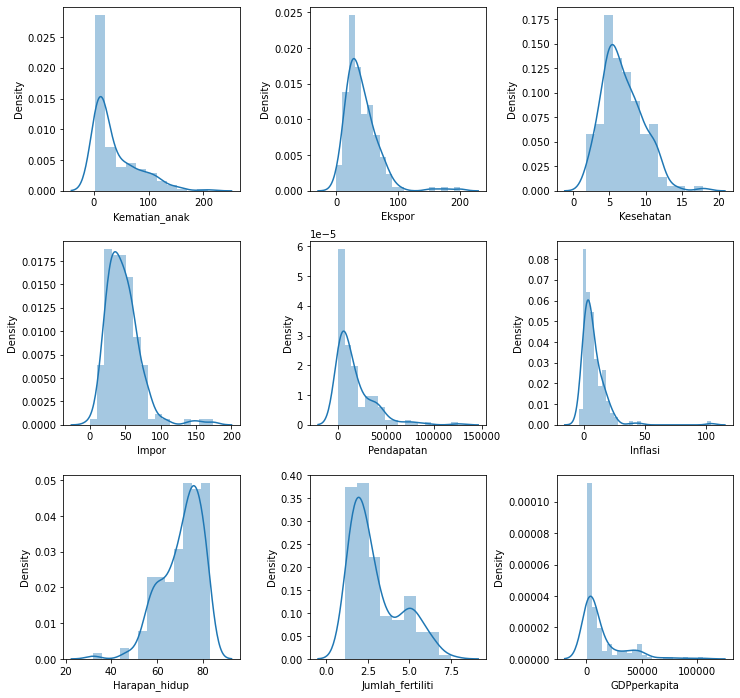

In [9]:
plt.figure(figsize=(12, 12))

for index, column in enumerate(df.describe().columns):
    plt.subplot(3, 3, index + 1)
    sns.distplot(df[column])
    
plt.subplots_adjust(wspace=0.4, hspace=0.27)
plt.savefig('images/univariate/distribution_plot.png', dpi=300)
plt.show()

#### Bivariate Analysis

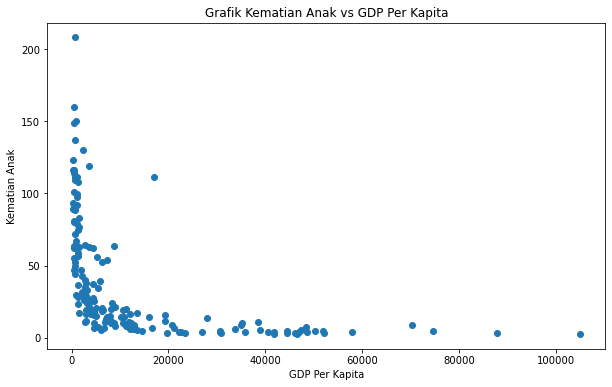

In [10]:
# Grafik Kematian Anak vs GDPperkapita
fig, axes = plt.subplots(figsize=(10, 6))
axes.scatter(x=df['GDPperkapita'], y=df['Kematian_anak'])
axes.set_xlabel('GDP Per Kapita')
axes.set_ylabel('Kematian Anak')
axes.set_title('Grafik Kematian Anak vs GDP Per Kapita')
plt.savefig('images/bivariate/Grafik Kematian Anak vs GDPperkapita.png', dpi=300)
plt.show()

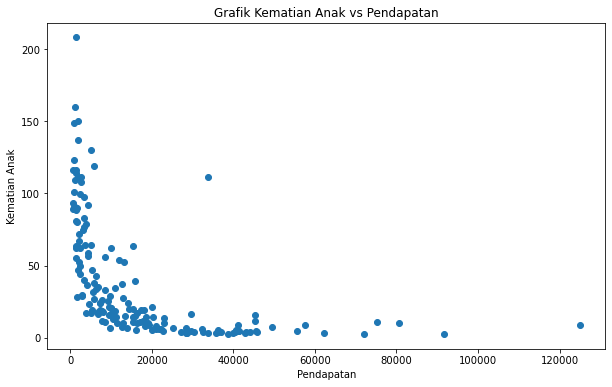

In [11]:
# Grafik Kematian Anak vs Pendapatan
fig, axes = plt.subplots(figsize=(10, 6))
axes.scatter(x=df['Pendapatan'], y=df['Kematian_anak'])
axes.set_xlabel('Pendapatan')
axes.set_ylabel('Kematian Anak')
axes.set_title('Grafik Kematian Anak vs Pendapatan')
plt.savefig('images/bivariate/Grafik Kematian Anak vs Pendapatan.png', dpi=300)
plt.show()

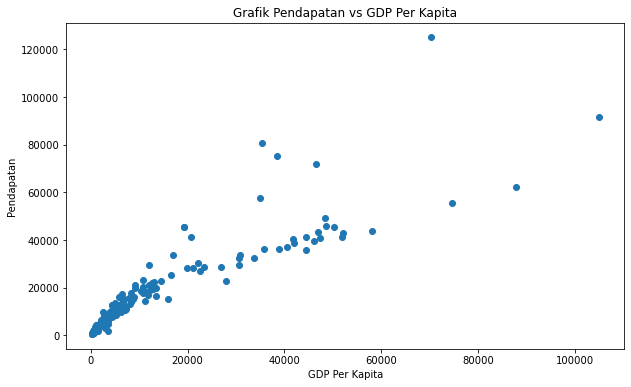

In [12]:
# Grafik Pendapatan vs GDP Per Kapita
fig, axes = plt.subplots(figsize=(10, 6))
axes.scatter(x=df['GDPperkapita'], y=df['Pendapatan'])
axes.set_xlabel('GDP Per Kapita')
axes.set_ylabel('Pendapatan')
axes.set_title('Grafik Pendapatan vs GDP Per Kapita')
plt.savefig('images/bivariate/Grafik Pendapatan vs GDP Per Kapita.png', dpi=300)
plt.show()

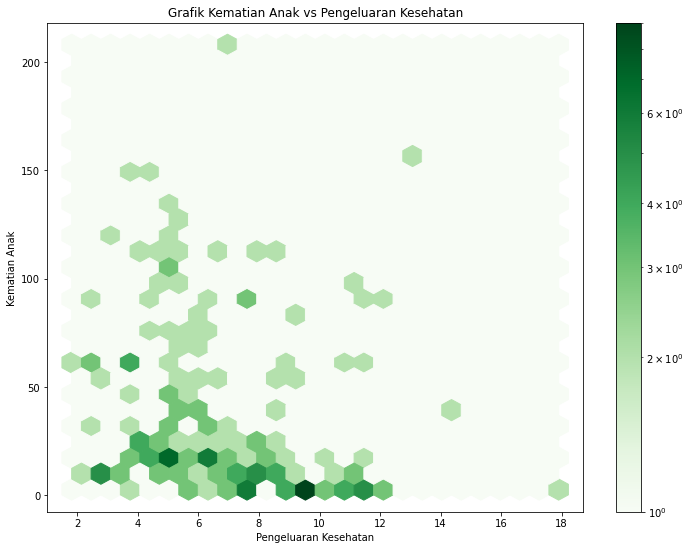

In [13]:
# Grafik Kematian Anak vs Pengeluaran Kesehatan
plt.figure(figsize=(12, 9))
plt.hexbin(x=df['Kesehatan'], y=df['Kematian_anak'], gridsize=25, bins='log', cmap=plt.cm.Greens)
plt.xlabel('Pengeluaran Kesehatan')
plt.ylabel('Kematian Anak')
plt.title('Grafik Kematian Anak vs Pengeluaran Kesehatan')
plt.colorbar()
plt.savefig('images/bivariate/Grafik Kematian Anak vs Pengeluaran Kesehatan.png', dpi=300)
plt.show()

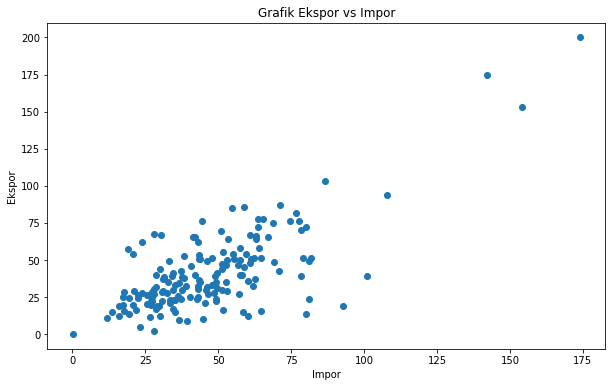

In [14]:
# Grafik Ekspor vs Impor
plt.figure(figsize=(10, 6))
plt.scatter(x=df['Impor'], y=df['Ekspor'])
plt.xlabel('Impor')
plt.ylabel('Ekspor')
plt.title('Grafik Ekspor vs Impor')
plt.savefig('images/bivariate/Grafik Ekspor vs Impor.png', dpi=300)
plt.show()

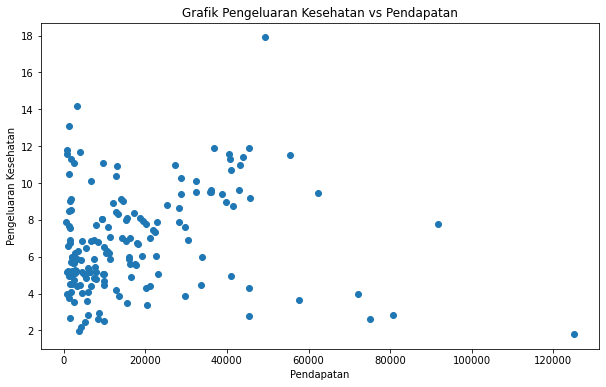

In [15]:
# Grafik Pengeluaran Kesehatan vs Pendapatan
plt.figure(figsize=(10, 6))
plt.scatter(x=df['Pendapatan'], y=df['Kesehatan'])
plt.xlabel('Pendapatan')
plt.ylabel('Pengeluaran Kesehatan')
plt.title('Grafik Pengeluaran Kesehatan vs Pendapatan')
plt.savefig('images/bivariate/Grafik Pengeluaran Kesehatan vs Pendapatan.png', dpi=300)
plt.show()

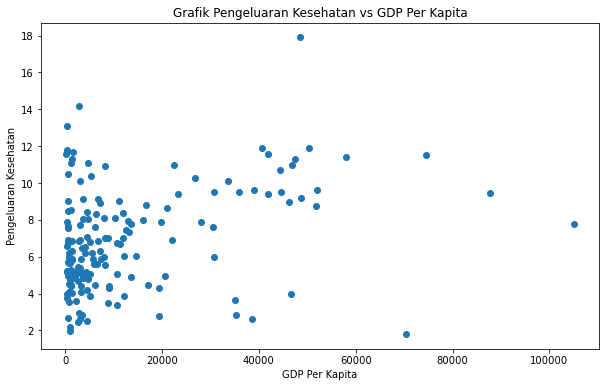

In [16]:
# Grafik Pengeluaran Kesehatan vs GDP Per Kapita
plt.figure(figsize=(10, 6))
plt.scatter(x=df['GDPperkapita'], y=df['Kesehatan'])
plt.xlabel('GDP Per Kapita')
plt.ylabel('Pengeluaran Kesehatan')
plt.title('Grafik Pengeluaran Kesehatan vs GDP Per Kapita')
plt.savefig('images/bivariate/Grafik Pengeluaran Kesehatan vs GDP Per Kapita.png', dpi=300)
plt.show()

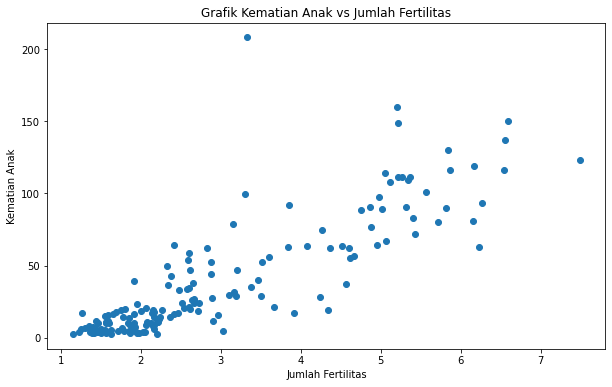

In [17]:
# Grafik Kematian Anak vs Jumlah Fertilitas
plt.figure(figsize=(10, 6))
plt.scatter(x=df['Jumlah_fertiliti'], y=df['Kematian_anak'])
plt.xlabel('Jumlah Fertilitas')
plt.ylabel('Kematian Anak')
plt.title('Grafik Kematian Anak vs Jumlah Fertilitas')
plt.savefig('images/bivariate/Grafik Kematian Anak vs Jumlah Fertilitas.png', dpi=300)
plt.show()

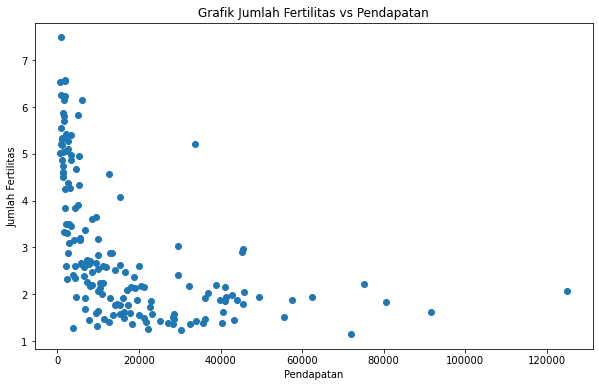

In [18]:
# Grafik Jumlah Fertilitas vs Pendapatan
plt.figure(figsize=(10, 6))
plt.scatter(x=df['Pendapatan'], y=df['Jumlah_fertiliti'])
plt.xlabel('Pendapatan')
plt.ylabel('Jumlah Fertilitas')
plt.title('Grafik Jumlah Fertilitas vs Pendapatan')
plt.savefig('images/bivariate/Grafik Jumlah Fertilitas vs Pendapatan.png', dpi=300)
plt.show()

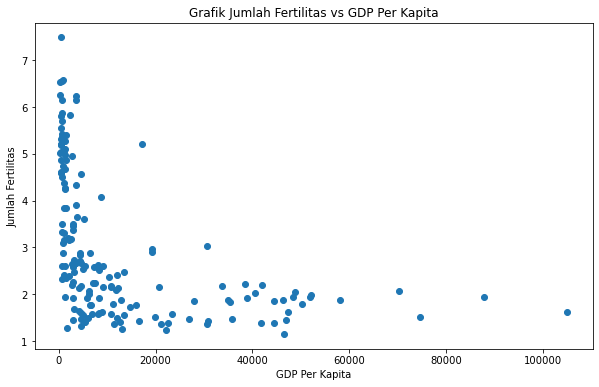

In [19]:
# Grafik Jumlah Fertilitas vs GDP Per Kapita
plt.figure(figsize=(10, 6))
plt.scatter(x=df['GDPperkapita'], y=df['Jumlah_fertiliti'])
plt.xlabel('GDP Per Kapita')
plt.ylabel('Jumlah Fertilitas')
plt.title('Grafik Jumlah Fertilitas vs GDP Per Kapita')
plt.savefig('images/bivariate/Grafik Jumlah Fertilitas vs GDP Per Kapita.png', dpi=300)
plt.show()

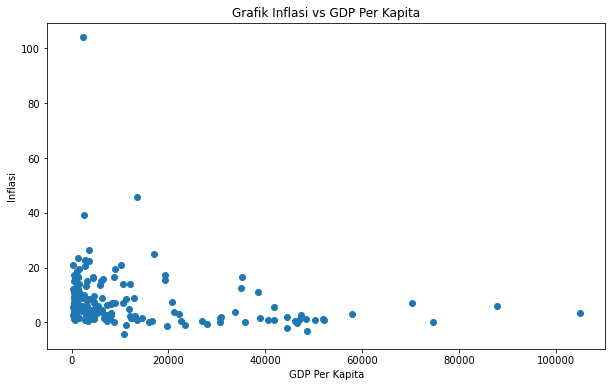

In [20]:
# Grafik Inflasi vs GDP Per Kapita
plt.figure(figsize=(10, 6))
plt.scatter(x=df['GDPperkapita'], y=df['Inflasi'])
plt.xlabel('GDP Per Kapita')
plt.ylabel('Inflasi')
plt.title('Grafik Inflasi vs GDP Per Kapita')
plt.savefig('images/bivariate/Grafik Inflasi vs GDP Per Kapita.png', dpi=300)
plt.show()

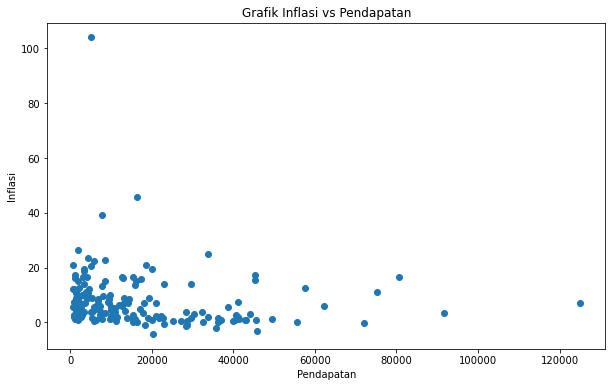

In [21]:
# Grafik Inflasi vs Pendapatan
plt.figure(figsize=(10, 6))
plt.scatter(x=df['Pendapatan'], y=df['Inflasi'])
plt.xlabel('Pendapatan')
plt.ylabel('Inflasi')
plt.title('Grafik Inflasi vs Pendapatan')
plt.savefig('images/bivariate/Grafik Inflasi vs Pendapatan.png', dpi=300)
plt.show()

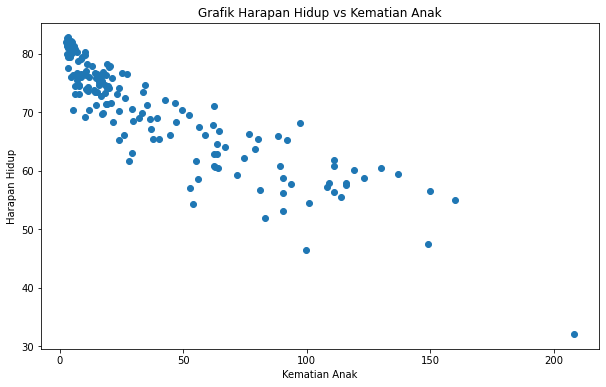

In [22]:
# Grafik Harapan Hidup vs Kematian Anak
plt.figure(figsize=(10, 6))
plt.scatter(x=df['Kematian_anak'], y=df['Harapan_hidup'])
plt.xlabel('Kematian Anak')
plt.ylabel('Harapan Hidup')
plt.title('Grafik Harapan Hidup vs Kematian Anak')
plt.savefig('images/bivariate/Grafik Harapan Hidup vs Kematian Anak.png', dpi=300)
plt.show()

#### Multivariate

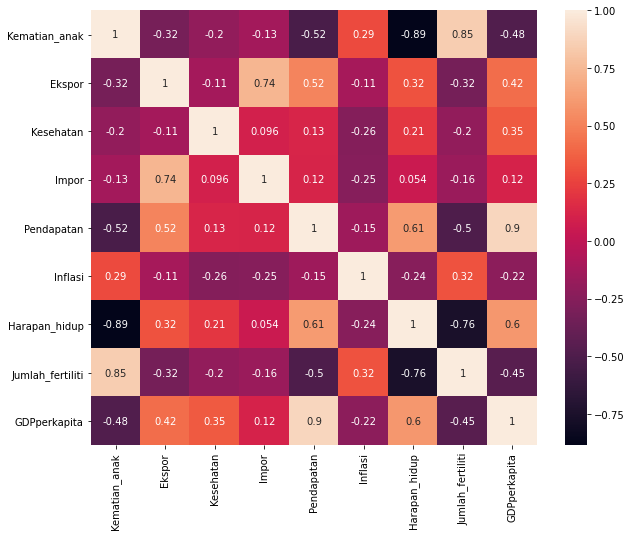

In [23]:
# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2g')
plt.savefig('images/multivariate/Heatmap_corr.png', dpi=300)
plt.show()

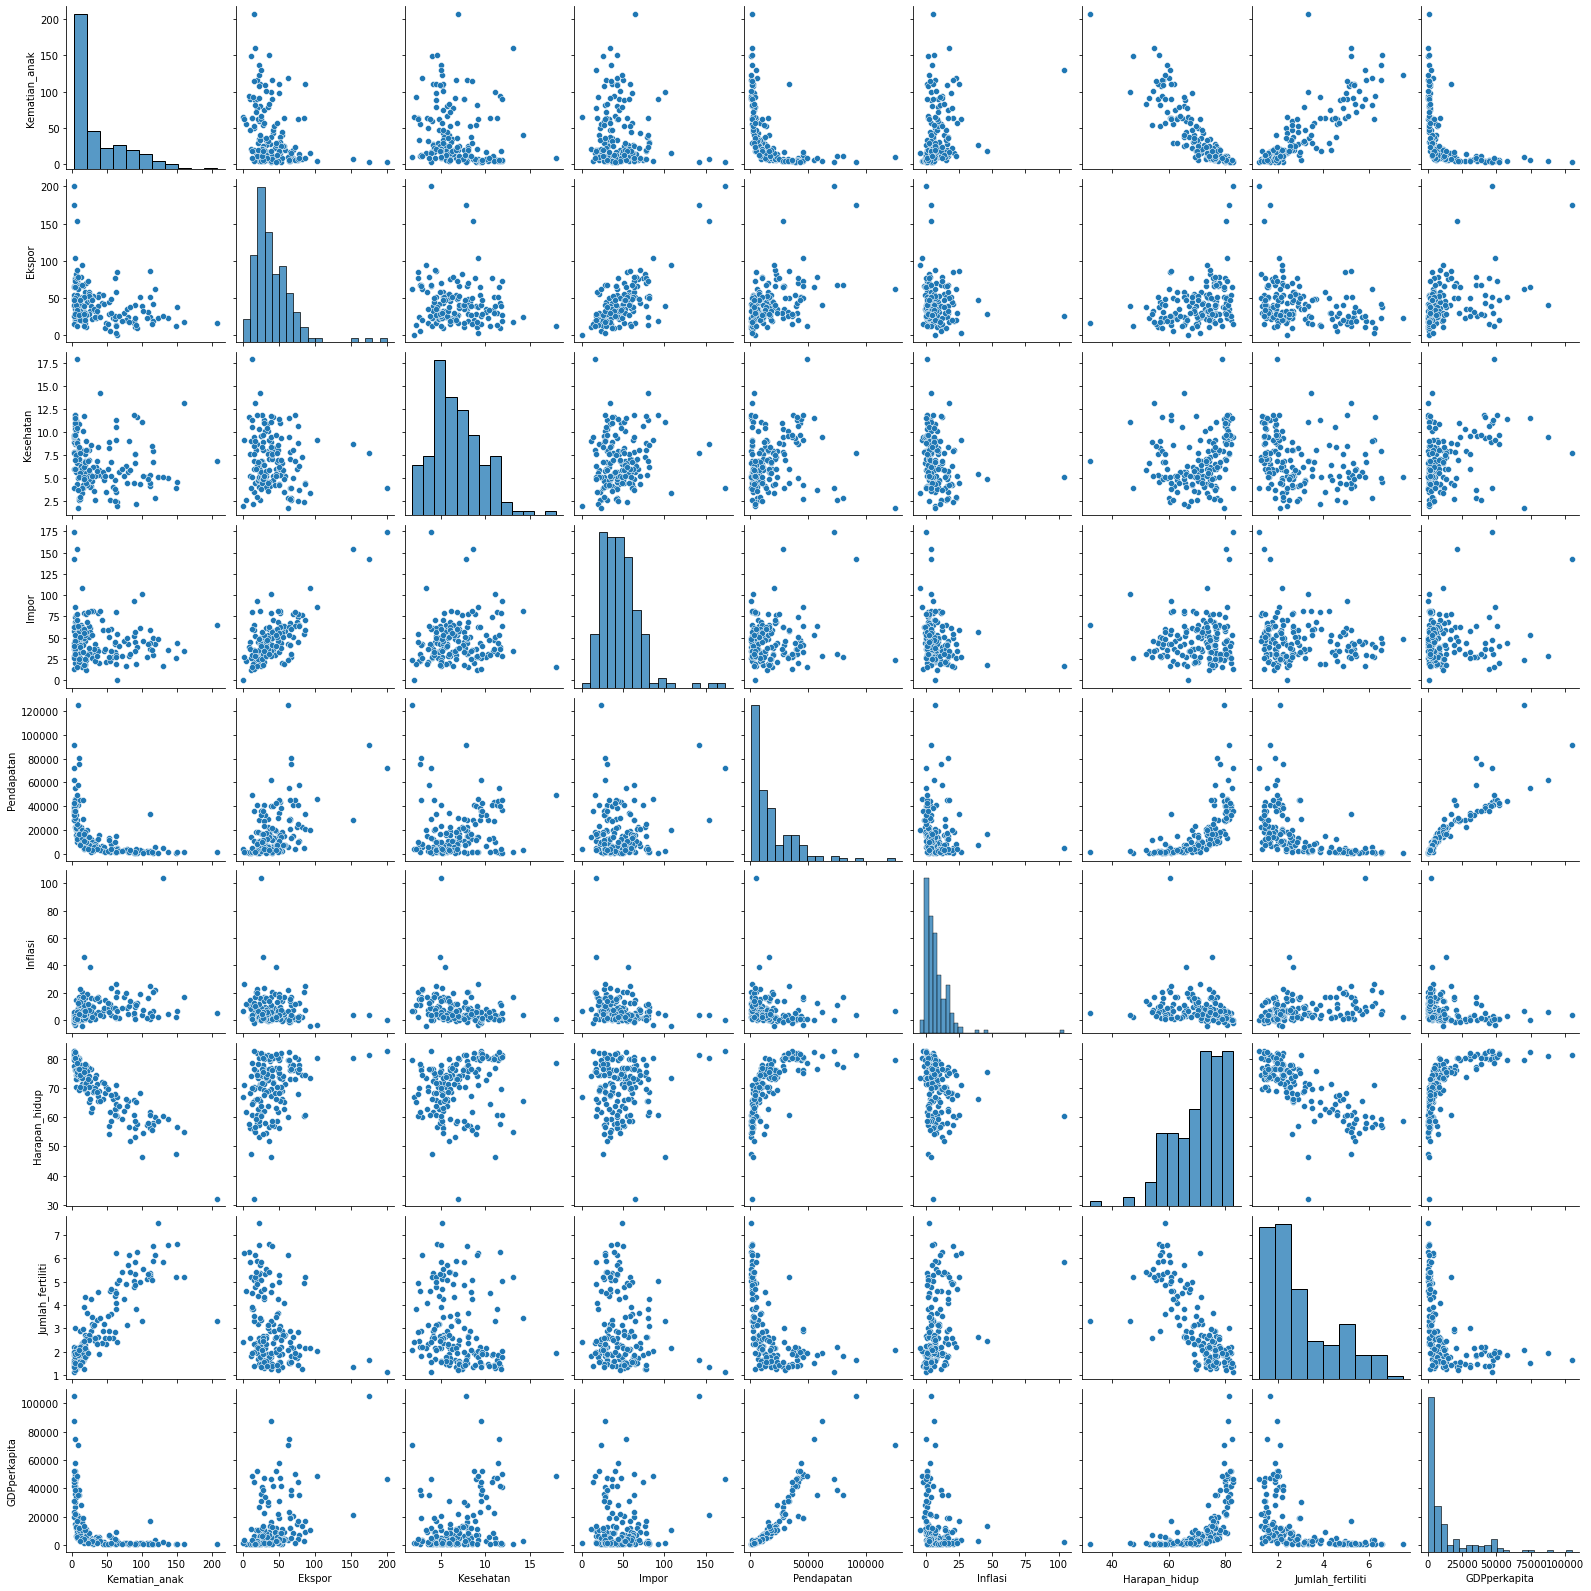

In [24]:
# Pair Plot
sns.pairplot(data=df)
plt.savefig('images/multivariate/Pair plot.png', dpi=300)
plt.show()

## Step 3: Outliers Treatment

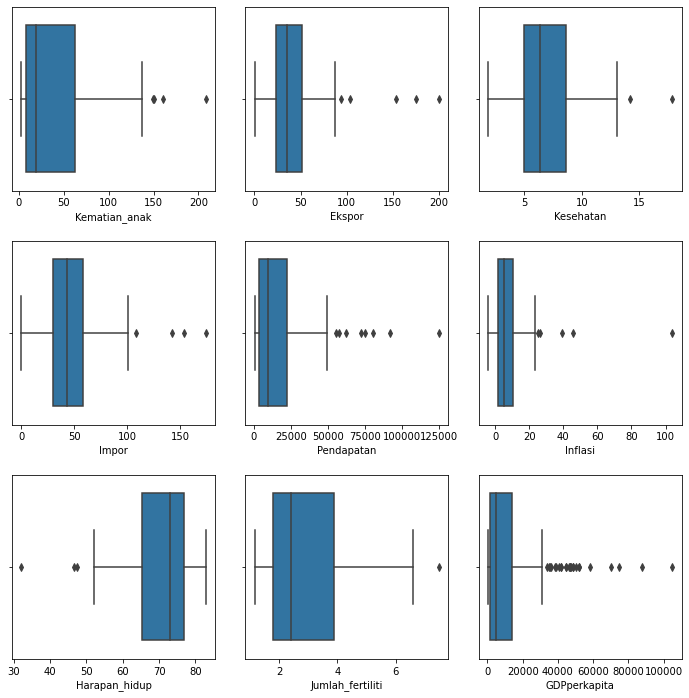

In [25]:
# Outliers
plt.figure(figsize=(12, 12))
for index, column in enumerate(df.describe().columns):
    plt.subplot(3, 3, index + 1)
    sns.boxplot(x=column, data=df)

plt.subplots_adjust(wspace=0.15, hspace=0.27)
plt.savefig('images/outliers/Outliers_boxplot.png', dpi=300)
plt.show()

In [26]:
countries = df['Negara']
df.drop('Negara', axis=1, inplace=True)
df

Kematian_anak  Ekspor  Kesehatan  Impor  Pendapatan  Inflasi  \
0             90.2    10.0       7.58   44.9        1610     9.44   
1             16.6    28.0       6.55   48.6        9930     4.49   
2             27.3    38.4       4.17   31.4       12900    16.10   
3            119.0    62.3       2.85   42.9        5900    22.40   
4             10.3    45.5       6.03   58.9       19100     1.44   
..             ...     ...        ...    ...         ...      ...   
162           29.2    46.6       5.25   52.7        2950     2.62   
163           17.1    28.5       4.91   17.6       16500    45.90   
164           23.3    72.0       6.84   80.2        4490    12.10   
165           56.3    30.0       5.18   34.4        4480    23.60   
166           83.1    37.0       5.89   30.9        3280    14.00   

     Harapan_hidup  Jumlah_fertiliti  GDPperkapita  
0             56.2              5.82           553  
1             76.3              1.65          4090  
2             76.5              2.89          4460  
3             60.1              6.16          3530  
4             76.8              2.13         12200  
..             ...               ...           ...  
162           63.0              3.50          2970  
163           75.4              2.47         13500  
164           73.1              1.95          1310  
165           67.5              4.67          1310  
166           52.0              5.40          1460  

[167 rows x 9 columns]

In [63]:
# Remove outliers
q1 = df.quantile(.25)
q3 = df.quantile(.75)
IQR = q3 - q1
df_clean = df[(df >= q1 - 1.5 * IQR) & (df <= q3 + 1.5 * IQR)]
df_clean.insert(0, 'Negara', countries)
df_clean.dropna(axis=0, inplace=True)
display(df_clean)

countries = df_clean['Negara']
df_clean.drop('Negara', axis=1, inplace=True)

Negara  Kematian_anak  Ekspor  Kesehatan  Impor  Pendapatan  \
0            Afghanistan           90.2    10.0       7.58   44.9      1610.0   
1                Albania           16.6    28.0       6.55   48.6      9930.0   
2                Algeria           27.3    38.4       4.17   31.4     12900.0   
3                 Angola          119.0    62.3       2.85   42.9      5900.0   
4    Antigua and Barbuda           10.3    45.5       6.03   58.9     19100.0   
..                   ...            ...     ...        ...    ...         ...   
161           Uzbekistan           36.3    31.7       5.81   28.5      4240.0   
162              Vanuatu           29.2    46.6       5.25   52.7      2950.0   
164              Vietnam           23.3    72.0       6.84   80.2      4490.0   
165                Yemen           56.3    30.0       5.18   34.4      4480.0   
166               Zambia           83.1    37.0       5.89   30.9      3280.0   

     Inflasi  Harapan_hidup  Jumlah_fertiliti  GDPperkapita  
0       9.44           56.2              5.82         553.0  
1       4.49           76.3              1.65        4090.0  
2      16.10           76.5              2.89        4460.0  
3      22.40           60.1              6.16        3530.0  
4       1.44           76.8              2.13       12200.0  
..       ...            ...               ...           ...  
161    16.50           68.8              2.34        1380.0  
162     2.62           63.0              3.50        2970.0  
164    12.10           73.1              1.95        1310.0  
165    23.60           67.5              4.67        1310.0  
166    14.00           52.0              5.40        1460.0  

[128 rows x 10 columns]

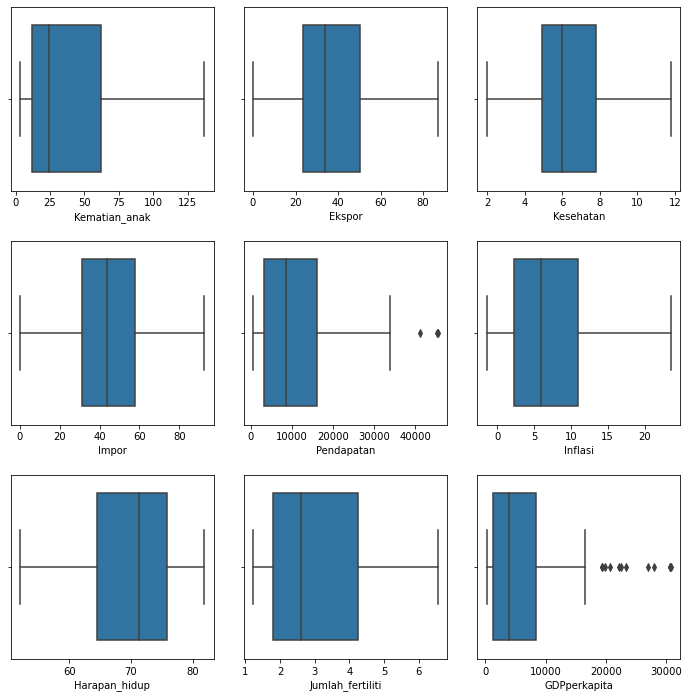

In [28]:
# Check using box plot
plt.figure(figsize=(12, 12))
for index, column in enumerate(df_clean.columns):
    plt.subplot(3, 3, index + 1)
    sns.boxplot(x=column, data=df_clean)

plt.subplots_adjust(wspace=0.15, hspace=0.27)
plt.savefig('images/outliers/Outliers_boxplot_after.png', bbox_inches='tight')
plt.show()

## Step 4: Scaling Data

In [68]:
# Feature scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_std = scaler.fit_transform(df_clean.astype(float))
print(df_std)
print(len(df_std))

[[ 1.51932554 -1.46502618  0.56023881 ... -1.82862656  1.9170303
  -0.82556137]
 [-0.65617368 -0.50355944  0.09299511 ...  0.89509857 -0.93877236
  -0.32838491]
 [-0.33989866  0.05195467 -0.98665539 ...  0.92220031 -0.08956485
  -0.27637607]
 ...
 [-0.45813231  1.84669258  0.22454916 ...  0.46147069 -0.73331893
  -0.71915408]
 [ 0.51729533 -0.3967298  -0.52848438 ... -0.2973781   1.12945883
  -0.71915408]
 [ 1.3094608  -0.02282607 -0.20640377 ... -2.39776315  1.6293955
  -0.69806942]]
128


## Step 5: Creating k means clustering and visualizing clusters formed

In [30]:
# KMeans Clustering labels
x_axis = ['Pendapatan', 'GDPperkapita']
y_axis = ['Kematian_anak', 'Kesehatan', 'Inflasi', 'Jumlah_fertiliti']
extra = [('Pendapatan', 'GDPperkapita'), ('Jumlah_fertiliti', 'Kematian_anak'), ('Kematian_anak', 'Harapan_hidup'), ('Impor', 'Ekspor')]
columns = df_clean.describe().columns
graphs = []

from sklearn.cluster import KMeans

kmeans1_labels = np.array([])

for y in y_axis:
    for x in x_axis:
        graphs.append((x, y))
        kmeans1 = KMeans(n_clusters = 2, random_state=42)
        kmeans1.fit(df_std[:, [np.where(columns == x)[0][0], np.where(columns == y)[0][0]]])
        if not kmeans1_labels.any():
            kmeans1_labels = np.array([kmeans1.labels_])
            centers = np.array([kmeans1.cluster_centers_])
            continue
        kmeans1_labels = np.append(kmeans1_labels, [kmeans1.labels_], axis=0)
        centers = np.append(centers, [kmeans1.cluster_centers_], axis=0)

for graph in extra:
    kmeans1 = KMeans(n_clusters = 2, random_state=42)
    kmeans1.fit(df_std[:, [np.where(columns == graph[0])[0][0], np.where(columns == graph[1])[0][0]]])
    kmeans1_labels = np.append(kmeans1_labels, [kmeans1.labels_], axis=0)
    centers = np.append(centers, [kmeans1.cluster_centers_], axis=0)
    
graphs.extend(extra)

In [31]:
df_kmeans = pd.DataFrame(data=df_std, columns=['Kematian_anak', 'Ekspor', 'Kesehatan', 'Impor', 'Pendapatan', 'Inflasi', 'Harapan_hidup', 'Jumlah_fertiliti', 'GDPperkapita'])
df_kmeans.insert(0, 'Negara', countries.reset_index(drop=True))
df_kmeans

Negara  Kematian_anak    Ekspor  Kesehatan     Impor  \
0            Afghanistan       1.519326 -1.465026   0.560239 -0.012828   
1                Albania      -0.656174 -0.503559   0.092995  0.196191   
2                Algeria      -0.339899  0.051955  -0.986655 -0.775465   
3                 Angola       2.370608  1.328569  -1.585453 -0.125811   
4    Antigua and Barbuda      -0.842392  0.431200  -0.142895  0.778055   
..                   ...            ...       ...        ...       ...   
123           Uzbekistan      -0.073873 -0.305925  -0.242695 -0.939291   
124              Vanuatu      -0.283738  0.489956  -0.496730  0.427807   
125              Vietnam      -0.458132  1.846693   0.224549  1.981328   
126                Yemen       0.517295 -0.396730  -0.528484 -0.605990   
127               Zambia       1.309461 -0.022826  -0.206404 -0.803711   

     Pendapatan   Inflasi  Harapan_hidup  Jumlah_fertiliti  GDPperkapita  
0     -0.979797  0.343115      -1.828627          1.917030     -0.825561  
1     -0.125286 -0.465551       0.895099         -0.938772     -0.328385  
2      0.179750  1.431138       0.922200         -0.089565     -0.276376  
3     -0.539189  2.460348      -1.300143          2.149878     -0.407101  
4      0.816525 -0.963819       0.962853         -0.610047      0.811593  
..          ...       ...            ...               ...           ...  
123   -0.709681  1.496484      -0.121217         -0.466229     -0.709315  
124   -0.842171 -0.771047      -0.907167          0.328190     -0.485817  
125   -0.684004  0.777671       0.461471         -0.733319     -0.719154  
126   -0.685031  2.656388      -0.297378          1.129459     -0.719154  
127   -0.808278  1.088067      -2.397763          1.629396     -0.698069  

[128 rows x 10 columns]

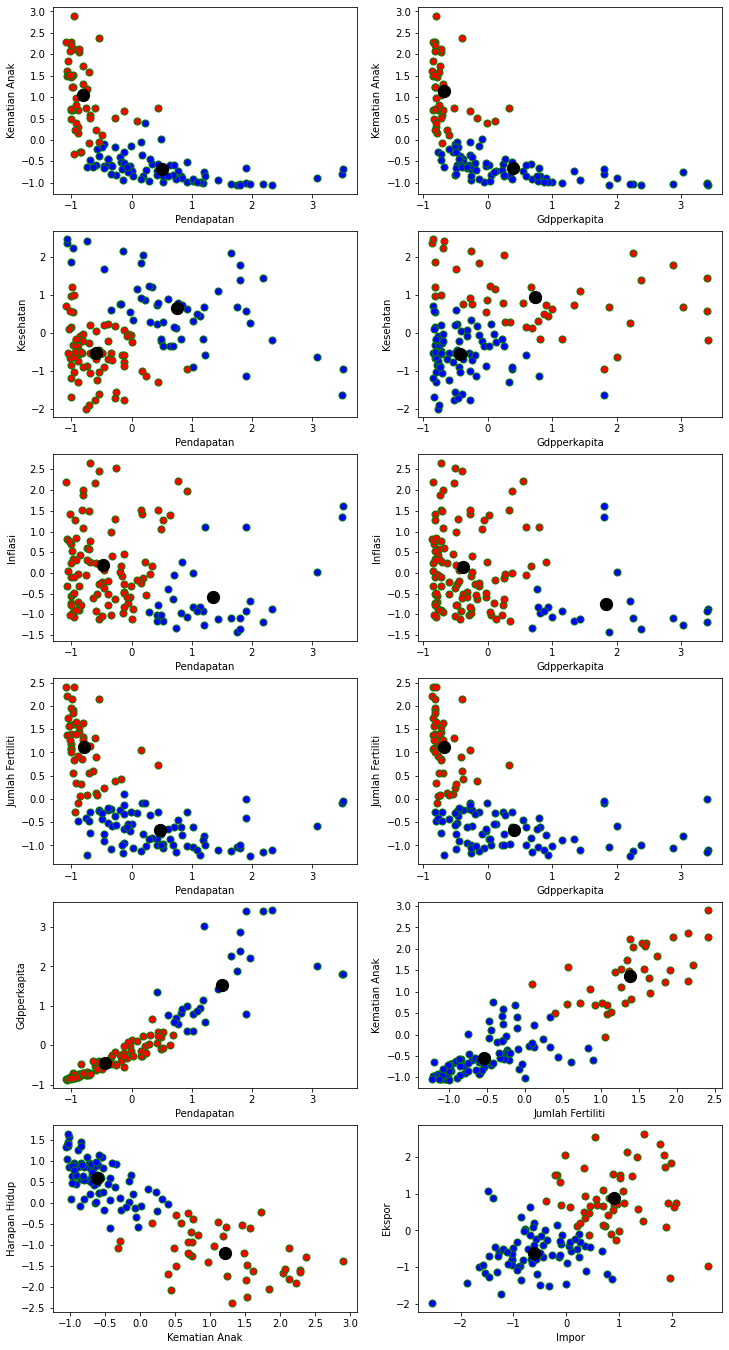

In [32]:
fig, axes = plt.subplots(6, 2, figsize=(12, 24))

for i, graph in enumerate(graphs):
    pos_0 = np.where(kmeans1_labels[i] == 0)
    pos_1 = np.where(kmeans1_labels[i] == 1)
    axes[i // 2][i % 2].scatter(df_kmeans.iloc[pos_0][graph[0]], df_kmeans.iloc[pos_0][graph[1]], c='blue', s=50, edgecolors='green')
    axes[i // 2][i % 2].scatter(df_kmeans.iloc[pos_1][graph[0]], df_kmeans.iloc[pos_1][graph[1]], c='red', s=50, edgecolors='green')
    axes[i // 2][i % 2].scatter(centers[i][:, 0], centers[i][:, 1], c='black', s=150)
    axes[i // 2][i % 2].set_xlabel(' '.join(graph[0].split('_')).title())
    axes[i // 2][i % 2].set_ylabel(' '.join(graph[1].split('_')).title())

fig.savefig('images/kmeans/kmeans_n2.png', dpi=300)
plt.show()

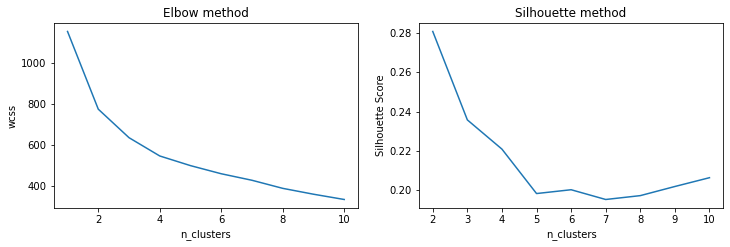

In [33]:
# Choose the best Number of Clusters
from sklearn.metrics import silhouette_score

wcss = []
silhouette_coefficients = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++').fit(df_std)
    wcss.append(kmeans.inertia_)
    if i > 1:
        silhouette_coefficients.append(silhouette_score(df_std, kmeans.labels_))

fig, axes = plt.subplots(1, 2, figsize=(12, 3.4))

axes[0].plot(range(1,11), wcss)
axes[0].set_title('Elbow method')
axes[0].set_xlabel('n_clusters')
axes[0].set_ylabel('wcss')

axes[1].plot(range(2,11), silhouette_coefficients)
axes[1].set_title('Silhouette method')
axes[1].set_xlabel('n_clusters')
axes[1].set_ylabel('Silhouette Score')

fig.savefig('images/kmeans/optimal_clusters.png', dpi=300)
plt.show()

In [69]:
# N_clusters = 3
kmeans2_labels = np.array([])

for graph in graphs:
    kmeans2 = KMeans(n_clusters = 3, random_state=42)
    kmeans2.fit(df_std[:, [np.where(columns == graph[0])[0][0], np.where(columns == graph[1])[0][0]]])
    if not kmeans2_labels.any():
        kmeans2_labels = np.array([kmeans2.labels_])
        centers2 = np.array([kmeans2.cluster_centers_])
        continue
    kmeans2_labels = np.append(kmeans2_labels, [kmeans2.labels_], axis=0)
    centers2 = np.append(centers2, [kmeans2.cluster_centers_], axis=0)

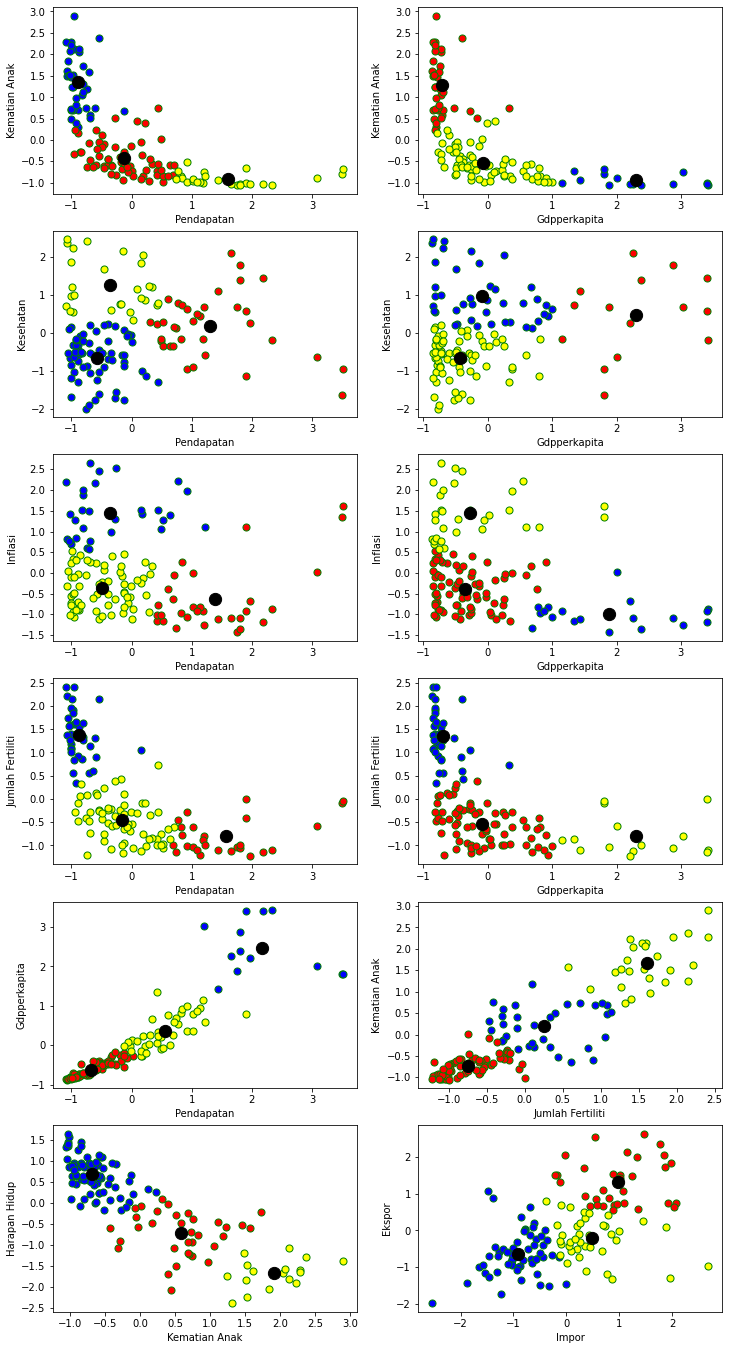

In [70]:
fig, axes = plt.subplots(6, 2, figsize=(12, 24))

for i, graph in enumerate(graphs):
    pos_0 = np.where(kmeans2_labels[i] == 0)
    pos_1 = np.where(kmeans2_labels[i] == 1)
    pos_2 = np.where(kmeans2_labels[i] == 2)
    axes[i // 2][i % 2].scatter(df_kmeans.iloc[pos_0][graph[0]], df_kmeans.iloc[pos_0][graph[1]], c='blue', s=50, edgecolors='green')
    axes[i // 2][i % 2].scatter(df_kmeans.iloc[pos_1][graph[0]], df_kmeans.iloc[pos_1][graph[1]], c='red', s=50, edgecolors='green')
    axes[i // 2][i % 2].scatter(df_kmeans.iloc[pos_2][graph[0]], df_kmeans.iloc[pos_2][graph[1]], c='yellow', s=50, edgecolors='green')
    axes[i // 2][i % 2].scatter(centers2[i][:, 0], centers2[i][:, 1], c='black', s=150)
    axes[i // 2][i % 2].set_xlabel(' '.join(graph[0].split('_')).title())
    axes[i // 2][i % 2].set_ylabel(' '.join(graph[1].split('_')).title())

fig.savefig('images/kmeans/kmeans_n3.png', dpi=300)
plt.show()

In [36]:
print('Silhouette Scores for n_clusters = 2')
for i, graph in enumerate(graphs):
    print(silhouette_score(df_std[:, [np.where(columns == graph[0])[0][0], np.where(columns == graph[1])[0][0]]], labels=kmeans1_labels[i]))

print('\nSilhouette Scores for n_clusters = 3')
for i, graph in enumerate(graphs):
    print(silhouette_score(df_std[:, [np.where(columns == graph[0])[0][0], np.where(columns == graph[1])[0][0]]], labels=kmeans2_labels[i]))

Silhouette Scores for n_clusters = 2
0.4973331550761366
0.49196917620298664
0.40255087583550286
0.4352522913794825
0.4124185320447457
0.4881053265296333
0.504583293767676
0.48536712054171516
0.6482885150246772
0.6582181408877602
0.6322149732393412
0.474554534659291

Silhouette Scores for n_clusters = 3
0.5040197740223208
0.5507024217401181
0.43219580965668836
0.4373680488350916
0.4342634533138948
0.48863119831713153
0.5037748903851085
0.5551996443592245
0.6019192388853021
0.5198363235991738
0.555778948589325
0.3629866176428373


## Step 6: Summary

In [72]:
df_clean.insert(0, 'Negara', countries)
df_clean

Negara  Kematian_anak  Ekspor  Kesehatan  Impor  Pendapatan  \
0            Afghanistan           90.2    10.0       7.58   44.9      1610.0   
1                Albania           16.6    28.0       6.55   48.6      9930.0   
2                Algeria           27.3    38.4       4.17   31.4     12900.0   
3                 Angola          119.0    62.3       2.85   42.9      5900.0   
4    Antigua and Barbuda           10.3    45.5       6.03   58.9     19100.0   
..                   ...            ...     ...        ...    ...         ...   
161           Uzbekistan           36.3    31.7       5.81   28.5      4240.0   
162              Vanuatu           29.2    46.6       5.25   52.7      2950.0   
164              Vietnam           23.3    72.0       6.84   80.2      4490.0   
165                Yemen           56.3    30.0       5.18   34.4      4480.0   
166               Zambia           83.1    37.0       5.89   30.9      3280.0   

     Inflasi  Harapan_hidup  Jumlah_fertiliti  GDPperkapita  
0       9.44           56.2              5.82         553.0  
1       4.49           76.3              1.65        4090.0  
2      16.10           76.5              2.89        4460.0  
3      22.40           60.1              6.16        3530.0  
4       1.44           76.8              2.13       12200.0  
..       ...            ...               ...           ...  
161    16.50           68.8              2.34        1380.0  
162     2.62           63.0              3.50        2970.0  
164    12.10           73.1              1.95        1310.0  
165    23.60           67.5              4.67        1310.0  
166    14.00           52.0              5.40        1460.0  

[128 rows x 10 columns]

In [73]:
# Filtering
pos = np.where((
    (kmeans2_labels[0] == 0) &
    (kmeans2_labels[1] == 1) & 
#     (kmeans2_labels[2] == 0) &
#     (kmeans2_labels[3] == 2) &
#     (kmeans2_labels[4] == 2) &
#     (kmeans2_labels[5] == 1) &
    (kmeans2_labels[6] == 0) &
    (kmeans2_labels[7] == 0) &
    (kmeans2_labels[8] == 1) &
    (kmeans2_labels[9] == 2) &
    (kmeans2_labels[10] == 2)
#     (kmeans2_labels[11] == 0)
))

negara_berkembang = df_clean.iloc[pos].sort_values(by=['GDPperkapita'], ascending=True)

In [74]:
# Negara yang sangat membutuhkan bantuan
display(negara_berkembang)

Negara  Kematian_anak  Ekspor  Kesehatan  Impor  Pendapatan  \
26            Burundi           93.6    8.92      11.60   39.2       764.0   
88            Liberia           89.3   19.10      11.80   92.6       700.0   
37   Congo, Dem. Rep.          116.0   41.10       7.91   49.6       609.0   
106        Mozambique          101.0   31.50       5.21   46.2       918.0   
94             Malawi           90.5   22.80       6.59   34.9      1030.0   
150              Togo           90.3   40.20       7.65   57.3      1210.0   
64      Guinea-Bissau          114.0   14.90       8.50   35.2      1390.0   
0         Afghanistan           90.2   10.00       7.58   44.9      1610.0   
25       Burkina Faso          116.0   19.20       6.74   29.6      1430.0   
155            Uganda           81.0   17.10       9.01   28.6      1540.0   
63             Guinea          109.0   30.30       4.93   43.2      1190.0   
97               Mali          137.0   22.80       4.98   35.1      1870.0   
17              Benin          111.0   23.80       4.10   37.2      1820.0   
40      Cote d'Ivoire          111.0   50.60       5.30   43.3      2690.0   
28           Cameroon          108.0   22.20       5.13   27.0      2660.0   
166            Zambia           83.1   37.00       5.89   30.9      3280.0   
3              Angola          119.0   62.30       2.85   42.9      5900.0   

     Inflasi  Harapan_hidup  Jumlah_fertiliti  GDPperkapita  
26    12.300           57.7              6.26         231.0  
88     5.470           60.8              5.02         327.0  
37    20.800           57.5              6.54         334.0  
106    7.640           54.5              5.56         419.0  
94    12.100           53.1              5.31         459.0  
150    1.180           58.7              4.87         488.0  
64     2.970           55.6              5.05         547.0  
0      9.440           56.2              5.82         553.0  
25     6.810           57.9              5.87         575.0  
155   10.600           56.8              6.15         595.0  
63    16.100           58.0              5.34         648.0  
97     4.370           59.5              6.55         708.0  
17     0.885           61.8              5.36         758.0  
40     5.390           56.3              5.27        1220.0  
28     1.910           57.3              5.11        1310.0  
166   14.000           52.0              5.40        1460.0  
3     22.400           60.1              6.16        3530.0

In [75]:
# 10 Negara yang paling membutuhkan bantuan
display(negara_berkembang[:10])

Negara  Kematian_anak  Ekspor  Kesehatan  Impor  Pendapatan  \
26            Burundi           93.6    8.92      11.60   39.2       764.0   
88            Liberia           89.3   19.10      11.80   92.6       700.0   
37   Congo, Dem. Rep.          116.0   41.10       7.91   49.6       609.0   
106        Mozambique          101.0   31.50       5.21   46.2       918.0   
94             Malawi           90.5   22.80       6.59   34.9      1030.0   
150              Togo           90.3   40.20       7.65   57.3      1210.0   
64      Guinea-Bissau          114.0   14.90       8.50   35.2      1390.0   
0         Afghanistan           90.2   10.00       7.58   44.9      1610.0   
25       Burkina Faso          116.0   19.20       6.74   29.6      1430.0   
155            Uganda           81.0   17.10       9.01   28.6      1540.0   

     Inflasi  Harapan_hidup  Jumlah_fertiliti  GDPperkapita  
26     12.30           57.7              6.26         231.0  
88      5.47           60.8              5.02         327.0  
37     20.80           57.5              6.54         334.0  
106     7.64           54.5              5.56         419.0  
94     12.10           53.1              5.31         459.0  
150     1.18           58.7              4.87         488.0  
64      2.97           55.6              5.05         547.0  
0       9.44           56.2              5.82         553.0  
25      6.81           57.9              5.87         575.0  
155    10.60           56.8              6.15         595.0